In [ ]:
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import load_files
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
from sklearn import tree

In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df=pd.read_csv('//content//drive//My Drive//A_Om Kant Sharma//Breast Cancer data.csv',encoding='latin1') 
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [ ]:
df.drop(['Unnamed: 32'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df.groupby('diagnosis').count()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357
M,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212


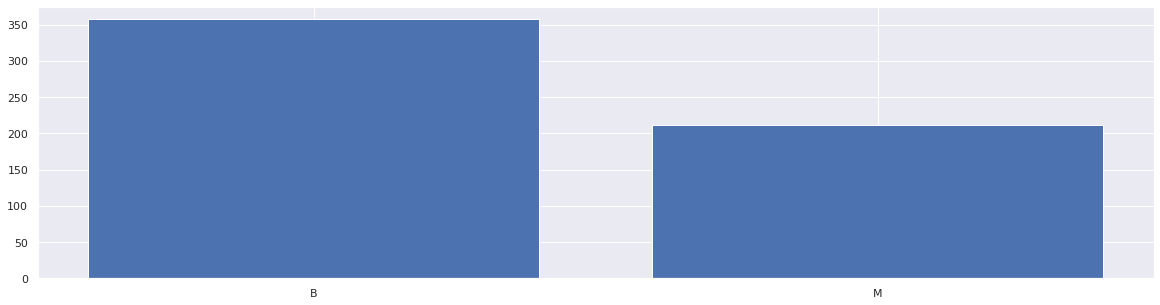

In [ ]:
r=df
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
Category_count=r.groupby('diagnosis').count()
plt.bar(Category_count.index.values, Category_count['perimeter_mean'])
plt.show()

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X=df.iloc[:,2:].values
y=df.iloc[:,1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [ ]:
X.shape,y.shape

((569, 30), (569,))

In [ ]:
print(X,y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 

# 1. Diagnosis

## 0. Artificial Neural Network (ANN)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(512, 30)
(57, 30)
(512,)
(57,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(512, 30)
(57, 30)
(512,)
(57,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # with_mean=False
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(units=16,activation='relu', input_shape=(30,)))  # output_dim=16, init='uniform', activation='relu', input_dim=30
model.add(Dropout(0.1))
model.add(Dense(units=16,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x=X_train, y=y_train, epochs=100,batch_size=50, validation_data=(X_test, y_test), verbose=1)
model.fit(x=X_train, y=y_train, epochs=150,batch_size=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
11/11 [==============================] - 1s 18ms/step - loss: 0.8559 - accuracy: 0.3945 - val_loss: 0.6848 - val_accuracy: 0.5263
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7625 - accuracy: 0.4902 - val_loss: 0.6199 - val_accuracy: 0.6667
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.6035 - val_loss: 0.5710 - val_accuracy: 0.7719
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6287 - accuracy: 0.6914 - val_loss: 0.5283 - val_accuracy: 0.8246
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 0.5624 - accuracy: 0.7637 - val_loss: 0.4911 - val_accuracy: 0.8947
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 0.5361 - accuracy: 0.8105 - val_loss: 0.4541 - val_accuracy: 0.9123
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.8477 - val_loss: 0.4178 - val_accuracy: 0.9123
Epoch 8/100


In [ ]:
y_pred_m1 = model.predict(X_test)
y_pred_m1

array([[1.0000000e+00],
       [2.4392847e-07],
       [2.8231138e-01],
       [5.1798133e-07],
       [4.9467908e-05],
       [1.0000000e+00],
       [4.1629128e-06],
       [1.0000000e+00],
       [1.0000000e+00],
       [5.1029474e-05],
       [1.5636380e-05],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.3177911e-06],
       [9.9999619e-01],
       [1.0854727e-01],
       [5.2228570e-03],
       [3.2526255e-04],
       [1.5203953e-03],
       [8.1979364e-02],
       [8.0235191e-10],
       [1.9547881e-05],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.3270145e-05],
       [9.8969436e-01],
       [4.3641907e-07],
       [1.0000000e+00],
       [9.9968421e-01],
       [9.9999869e-01],
       [9.2784390e-08],
       [9.9999946e-01],
       [1.0000000e+00],
       [5.1420927e-04],
       [4.2915613e-06],
       [4.2191446e-03],
       [6.0195572e-07],
       [1.0000000e+00],
       [4.3693589e-07],
       [2.8130833e-05],
       [1.000000

In [ ]:
y_pred_m1_cls = model.predict_classes(X_test)
y_pred_m1_cls

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0]], dtype=int32)

In [ ]:
y_pred = model.predict_classes(X_test)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0]], dtype=int32)

In [ ]:
loss,acc = model.evaluate(X_test,y_test)
print('Loss',loss)
print('Accuracy',acc)

2/2 [==============================] - 0s 5ms/step - loss: 0.0431 - accuracy: 0.9649
Loss 0.04305332899093628
Accuracy 0.9649122953414917


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[31  0]
 [ 2 24]]


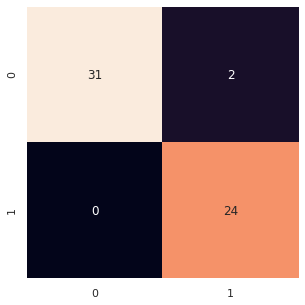

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
lr= confusion_matrix(y_test,y_pred)
sns.heatmap(lr.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

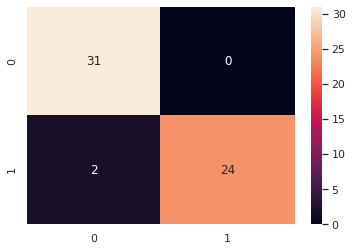

In [ ]:
import seaborn as sns
sns.heatmap(lr, annot=True)
plt.show()

In [ ]:
print(accuracy_score(y_test, y_pred))

0.9649122807017544


loss,acc = model.evaluate(X_test, y_test)
print('Loss is',loss)
print('Accuracy is',acc)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        31
           1       1.00      0.92      0.96        26

    accuracy                           0.96        57
   macro avg       0.97      0.96      0.96        57
weighted avg       0.97      0.96      0.96        57



In [ ]:
df.shape

(569, 32)

In [ ]:
X=df.iloc[:,2:]
y=df.iloc[:,1]

In [ ]:
X.head(2),y.head(2)

(   radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
 0        17.99         10.38  ...          0.4601                  0.11890
 1        20.57         17.77  ...          0.2750                  0.08902
 
 [2 rows x 30 columns], 0    M
 1    M
 Name: diagnosis, dtype: object)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

In [ ]:
#text_tf,r['OriginalTweet'],r['Sentiment1']

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### 1. Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
nb= MultinomialNB().fit(x_train,y_train)
nb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
nb.score(x_train,y_train)

0.8967032967032967

In [ ]:
nb.score(x_test,y_test)

0.9035087719298246

In [ ]:
y_pred_nb= nb.predict(x_test)
print(len(y_pred_nb))
y_pred_nb

114


array(['B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M'], dtype='<U1')

In [ ]:
metrics.accuracy_score(y_test,y_pred_nb)

0.9035087719298246

In [ ]:
print(confusion_matrix (y_test,y_pred_nb))

[[71  2]
 [ 9 32]]


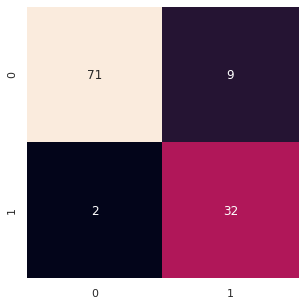

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
nb= confusion_matrix(y_test,y_pred_nb)
sns.heatmap(nb.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [ ]:
nb_df=pd.DataFrame({'y_test':y_test,'y_pred_nb':y_pred_nb})
nb_df.head()

,y_test,y_pred_nb
333,B,B
273,B,B
201,M,M
178,B,B
85,M,M


In [ ]:
nb_df.groupby(['y_test','y_pred_nb'])['y_pred_nb'].count()  

y_test  y_pred_nb
B       B            71
        M             2
M       B             9
        M            32
Name: y_pred_nb, dtype: int64

In [ ]:
from sklearn.metrics import classification_report
print(classification_report (y_test,y_pred_nb))

              precision    recall  f1-score   support

           B       0.89      0.97      0.93        73
           M       0.94      0.78      0.85        41

    accuracy                           0.90       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.91      0.90      0.90       114



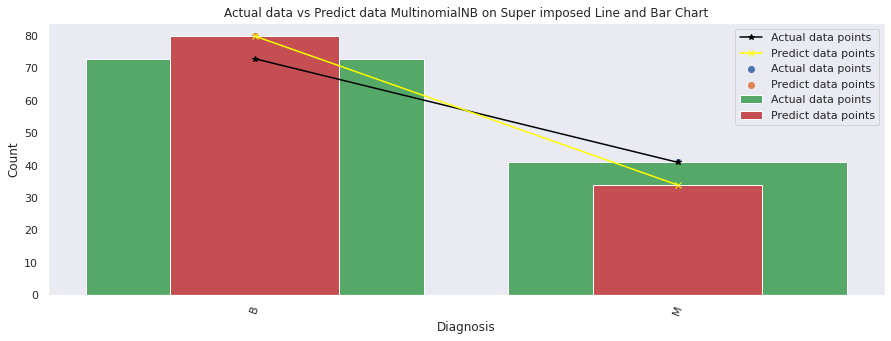

In [ ]:
actual_nb=nb_df['y_test'].value_counts()
predict_nb=nb_df['y_pred_nb'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data MultinomialNB on Super imposed Line and Bar Chart")
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [ ]:
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test,y_pred_nb))

MultinomialNB Accuracy: 0.9035087719298246


### 2. Classification (Logistic Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.score(x_train,y_train)

0.9516483516483516

In [ ]:
lr.score(x_test,y_test)

0.9824561403508771

In [ ]:
y_pred_lr = lr.predict(x_test)
len(y_pred_lr),y_pred_lr

(114, array(['B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
        'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
        'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
        'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'M',
        'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
        'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M',
        'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
        'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
        'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M'], dtype=object))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_lr)

array([[73,  0],
       [ 2, 39]])

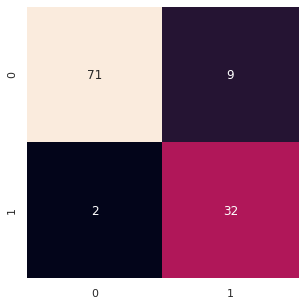

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
lr= confusion_matrix(y_test,y_pred_nb)
sns.heatmap(lr.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [ ]:
lr_df=pd.DataFrame({'y_test':y_test,'y_pred_lr':y_pred_lr})
lr_df.head()

,y_test,y_pred_lr
333,B,B
273,B,B
201,M,M
178,B,B
85,M,M


In [ ]:
lr_df.groupby(['y_test','y_pred_lr'])['y_pred_lr'].count()

y_test  y_pred_lr
B       B            73
M       B             2
        M            39
Name: y_pred_lr, dtype: int64

In [ ]:
from sklearn.metrics import classification_report
print(classification_report (y_test,y_pred_lr))

              precision    recall  f1-score   support

           B       0.97      1.00      0.99        73
           M       1.00      0.95      0.97        41

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



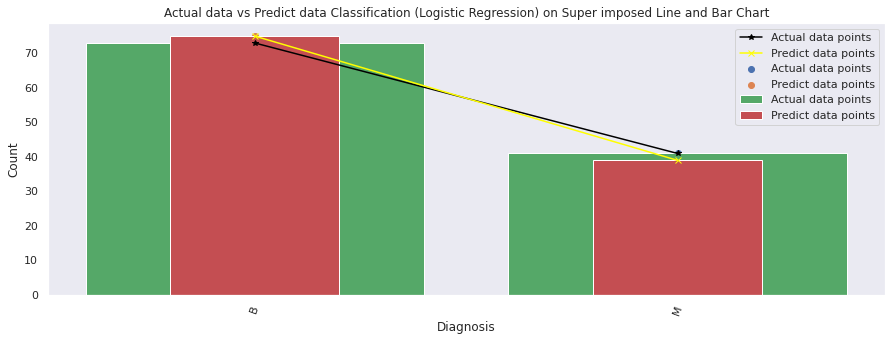

In [ ]:
actual_nb=lr_df['y_test'].value_counts()
predict_nb=lr_df['y_pred_lr'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Classification (Logistic Regression) on Super imposed Line and Bar Chart")
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [ ]:
metrics.accuracy_score(y_test,y_pred_lr)

0.9824561403508771

### 3. Random  Forest  Classifier  

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=10,max_depth=5,max_features='sqrt',min_samples_split=20)

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc.fit(x_test,y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc.score(x_test,y_test)

1.0

In [ ]:
rfc.score(x_train,y_train)

0.9406593406593406

In [ ]:
y_pred_rfc = rfc.predict(x_test)
y_pred_rfc

array(['B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M'], dtype=object)

In [ ]:
metrics.accuracy_score(y_test,y_pred_rfc)

1.0

In [ ]:
confusion_matrix(y_test,y_pred_rfc)

array([[73,  0],
       [ 0, 41]])

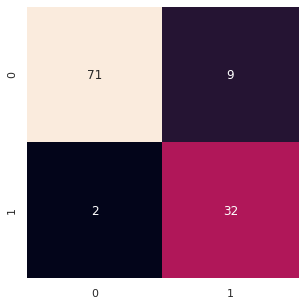

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
rfc= confusion_matrix(y_test,y_pred_nb)
sns.heatmap(rfc.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [ ]:
rfc_df=pd.DataFrame({'y_test':y_test,'y_pred_rfc':y_pred_rfc})
rfc_df.head()

,y_test,y_pred_rfc
333,B,B
273,B,B
201,M,M
178,B,B
85,M,M


In [ ]:
rfc_df.groupby(['y_test','y_pred_rfc'])['y_pred_rfc'].count()

y_test  y_pred_rfc
B       B             73
M       M             41
Name: y_pred_rfc, dtype: int64

In [ ]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           B       1.00      1.00      1.00        73
           M       1.00      1.00      1.00        41

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



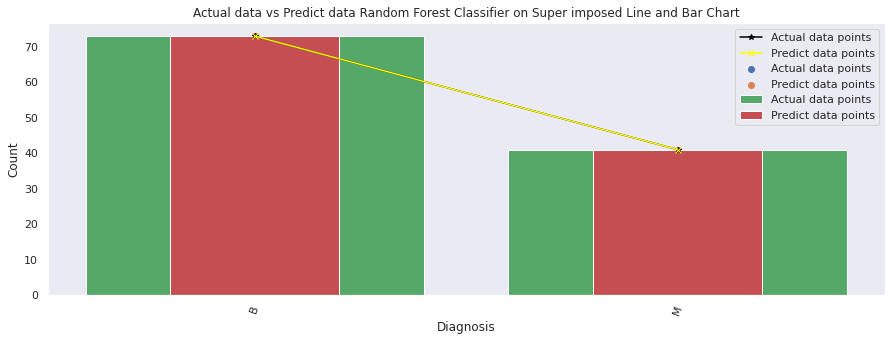

In [ ]:
actual_nb=rfc_df['y_test'].value_counts()
predict_nb=rfc_df['y_pred_rfc'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Random Forest Classifier on Super imposed Line and Bar Chart")
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [ ]:
metrics.accuracy_score(y_test,y_pred_rfc)

1.0

### 4. Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print(dt.score(x_train,y_train))
print(dt.score(x_test,y_test))

1.0
0.9649122807017544


In [ ]:
y_pred_dt = dt.predict(x_test)
y_pred_dt

array(['B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M'], dtype=object)

In [ ]:
confusion_matrix(y_test,y_pred_dt)

array([[72,  1],
       [ 3, 38]])

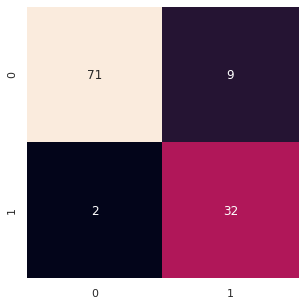

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
dt= confusion_matrix(y_test,y_pred_nb)
sns.heatmap(dt.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        73
           M       0.97      0.93      0.95        41

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
dt_df=pd.DataFrame({'y_test':y_test,'y_pred_dt':y_pred_dt})
dt_df.head()

,y_test,y_pred_dt
333,B,B
273,B,B
201,M,M
178,B,B
85,M,M


In [ ]:
dt_df.groupby(['y_test','y_pred_dt'])['y_pred_dt'].count()

y_test  y_pred_dt
B       B            72
        M             1
M       B             3
        M            38
Name: y_pred_dt, dtype: int64

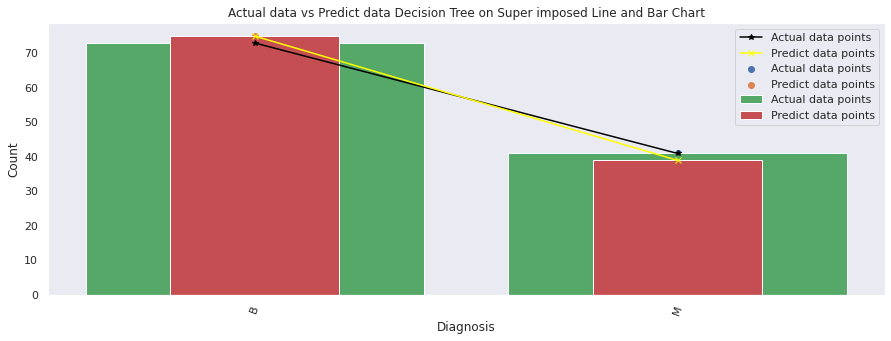

In [ ]:
actual_nb=dt_df['y_test'].value_counts()
predict_nb=dt_df['y_pred_dt'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Decision Tree on Super imposed Line and Bar Chart")
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [ ]:
print(accuracy_score(y_test,y_pred_dt))

0.9649122807017544


### 5. K- Nearest Neighbor 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [ ]:
print(knn.score(x_train,y_train))

0.9274725274725275


In [ ]:
print(knn.score(x_test,y_test))

0.9385964912280702


In [ ]:
y_pred_knn = knn.predict(x_test)  # numpy
y_pred_knn

array(['B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M'], dtype=object)

In [ ]:
print(confusion_matrix (y_test,y_pred_knn))

[[72  1]
 [ 6 35]]


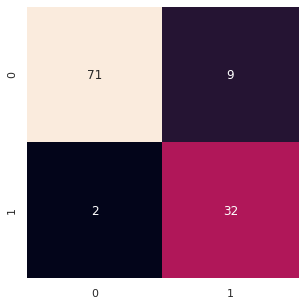

In [ ]:

from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
knn= confusion_matrix(y_test,y_pred_nb)
sns.heatmap(knn.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [ ]:
knn_df=pd.DataFrame({'y_test':y_test,'y_pred_knn':y_pred_knn})
knn_df.head()

,y_test,y_pred_knn
333,B,B
273,B,B
201,M,M
178,B,B
85,M,M


In [ ]:
knn_df.groupby(['y_test','y_pred_knn'])['y_pred_knn'].count()

y_test  y_pred_knn
B       B             72
        M              1
M       B              6
        M             35
Name: y_pred_knn, dtype: int64

In [ ]:
print(classification_report (y_test,y_pred_knn))

              precision    recall  f1-score   support

           B       0.92      0.99      0.95        73
           M       0.97      0.85      0.91        41

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



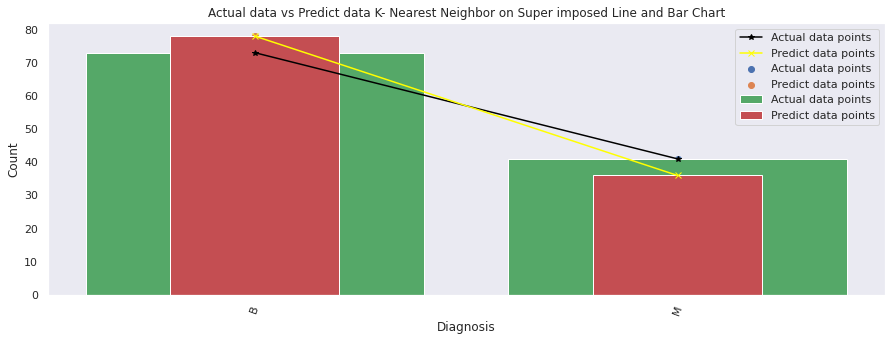

In [ ]:
actual_nb=knn_df['y_test'].value_counts()
predict_nb=knn_df['y_pred_knn'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data K- Nearest Neighbor on Super imposed Line and Bar Chart")
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [ ]:
metrics.accuracy_score(y_test,y_pred_knn)

0.9385964912280702

### Support Vector Machines (SVM) and Radial Basis Function (RBF) kernel

#### Linear SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_lin = SVC(kernel = 'linear')
svc_lin.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print(svc_lin.score(x_train,y_train))
print(svc_lin.score(x_test,y_test))

0.9626373626373627
0.9824561403508771


In [ ]:
y_pred_lin = svc_lin.predict(x_test)
y_pred_lin

array(['B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred_lin)

array([[73,  0],
       [ 2, 39]])

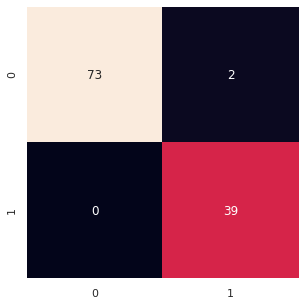

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
svc_lin= confusion_matrix(y_test,y_pred_lin)
sns.heatmap(svc_lin.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_lin))

              precision    recall  f1-score   support

           B       0.97      1.00      0.99        73
           M       1.00      0.95      0.97        41

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
svc_df=pd.DataFrame({'y_test':y_test,'y_pred_lin':y_pred_lin})
svc_df.head()

,y_test,y_pred_lin
333,B,B
273,B,B
201,M,M
178,B,B
85,M,M


In [ ]:
svc_df.groupby(['y_test','y_pred_lin'])['y_pred_lin'].count()   

y_test  y_pred_lin
B       B             73
M       B              2
        M             39
Name: y_pred_lin, dtype: int64

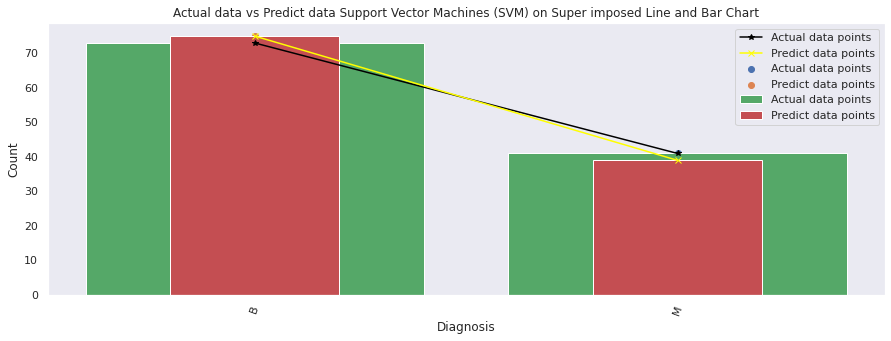

In [ ]:
actual_nb=svc_df['y_test'].value_counts()
predict_nb=svc_df['y_pred_lin'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Support Vector Machines (SVM) on Super imposed Line and Bar Chart")
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [ ]:
print('Accuracy Score for Poly SVC',accuracy_score(y_test,y_pred_lin))

Accuracy Score for Poly SVC 0.9824561403508771


### Radial Basis Function (RBF) kernel

In [ ]:
svc_rbf = SVC(kernel = 'rbf',C=0.2,gamma=0.3)
svc_rbf.fit(x_train,y_train)

SVC(C=0.2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print(svc_rbf.score(x_train,y_train))
print(svc_rbf.score(x_test,y_test))

0.6241758241758242
0.6403508771929824


In [ ]:
y_pred_rbf = svc_rbf.predict(x_test)
y_pred_rbf

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'], dtype=object)

In [ ]:
confusion_matrix(y_test,y_pred_rbf)

array([[73,  0],
       [41,  0]])

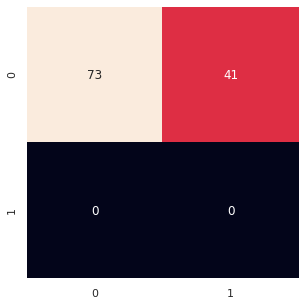

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
svc_rbf= confusion_matrix(y_test,y_pred_rbf)
sns.heatmap(svc_rbf.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_rbf))

              precision    recall  f1-score   support

           B       0.64      1.00      0.78        73
           M       0.00      0.00      0.00        41

    accuracy                           0.64       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.41      0.64      0.50       114



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Accuracy Score for Poly SVC',accuracy_score(y_test,y_pred_rbf))

Accuracy Score for Poly SVC 0.6403508771929824


In [ ]:
svc_df=pd.DataFrame({'y_test':y_test,'y_pred_rbf':y_pred_rbf})
svc_df.head()

,y_test,y_pred_rbf
333,B,B
273,B,B
201,M,B
178,B,B
85,M,B


In [ ]:
svc_df.groupby(['y_test','y_pred_rbf'])['y_pred_rbf'].count()   

y_test  y_pred_rbf
B       B             73
M       B             41
Name: y_pred_rbf, dtype: int64

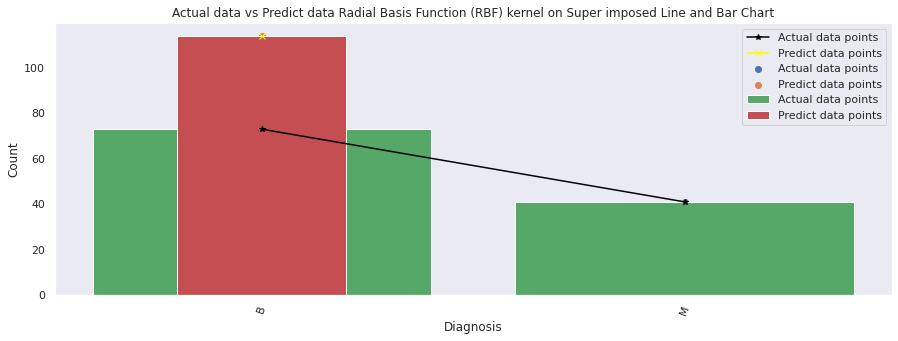

In [ ]:
actual_nb=svc_df['y_test'].value_counts()
predict_nb=svc_df['y_pred_rbf'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Radial Basis Function (RBF) kernel on Super imposed Line and Bar Chart")
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [ ]:
print('Accuracy Score for Poly SVC',accuracy_score(y_test,y_pred_rbf))

Accuracy Score for Poly SVC 0.6403508771929824


# Artificial Neural Network Use Two Model 

## 3. Diagnosis_B  4 diagnosis_M

In [ ]:
df1 = pd.get_dummies(df,columns=['diagnosis'])
df1

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,1


In [ ]:
X1 = df1.iloc[:, 1:31].values
y1 = df1.iloc[:, -2:].values
print(X1.shape)
print(y1.shape)

(569, 30)
(569, 2)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(512, 30)
(57, 30)
(512, 2)
(57, 2)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
model1 = Sequential()
model1.add(Dense(units=16,activation='relu', input_shape=(30,)))  # output_dim=16, init='uniform', activation='relu', input_dim=30
model1.add(Dropout(0.1))
model1.add(Dense(units=16,activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(units=2,activation='sigmoid'))

# For a binary classification problem
model1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
model1.fit(x=X_train, y=y_train, epochs=150,batch_size=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/150
6/6 [==============================] - 1s 29ms/step - loss: 0.7961 - accuracy: 0.5977 - val_loss: 0.7318 - val_accuracy: 0.7368
Epoch 2/150
6/6 [==============================] - 0s 5ms/step - loss: 0.7373 - accuracy: 0.6914 - val_loss: 0.6913 - val_accuracy: 0.8421
Epoch 3/150
6/6 [==============================] - 0s 5ms/step - loss: 0.6904 - accuracy: 0.7441 - val_loss: 0.6572 - val_accuracy: 0.8772
Epoch 4/150
6/6 [==============================] - 0s 5ms/step - loss: 0.6401 - accuracy: 0.8496 - val_loss: 0.6254 - val_accuracy: 0.9123
Epoch 5/150
6/6 [==============================] - 0s 5ms/step - loss: 0.6061 - accuracy: 0.8418 - val_loss: 0.5953 - val_accuracy: 0.9298
Epoch 6/150
6/6 [==============================] - 0s 6ms/step - loss: 0.5754 - accuracy: 0.8711 - val_loss: 0.5635 - val_accuracy: 0.9298
Epoch 7/150
6/6 [==============================] - 0s 5ms/step - loss: 0.5292 - accuracy: 0.8867 - val_loss: 0.5294 - val_accuracy: 0.9298
Epoch 8/150
6/6 [=========

In [ ]:
y_pred_m1 = model.predict(X_test)
y_pred_m1

array([[1.0000000e+00],
       [1.0000000e+00],
       [5.0272483e-06],
       [1.5354395e-02],
       [2.7942344e-06],
       [7.2497037e-06],
       [1.4778972e-04],
       [9.3483628e-05],
       [3.2094121e-04],
       [1.0000000e+00],
       [6.0257175e-06],
       [1.0000000e+00],
       [2.7263165e-04],
       [1.5294850e-03],
       [5.7554604e-07],
       [4.9678099e-05],
       [2.8572162e-09],
       [1.0703504e-03],
       [1.0000000e+00],
       [7.2754870e-07],
       [1.2958318e-02],
       [1.0130197e-02],
       [1.0000000e+00],
       [1.5802741e-02],
       [1.0000000e+00],
       [5.9252733e-01],
       [9.0599060e-04],
       [3.8511611e-05],
       [1.6233444e-02],
       [8.6569594e-07],
       [7.8253578e-07],
       [9.9706745e-01],
       [2.7591974e-02],
       [1.9806206e-02],
       [4.2889812e-07],
       [3.1205295e-07],
       [4.3215317e-07],
       [2.5895423e-07],
       [1.0000000e+00],
       [1.4207003e-05],
       [9.9999875e-01],
       [7.711601

In [ ]:
y_pred_m1_cls = model.predict_classes(X_test)
y_pred_m1_cls

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
loss,acc = model1.evaluate(X_test,y_test)
print('Loss',loss)
print('Accuracy',acc)

2/2 [==============================] - 0s 5ms/step - loss: 0.1641 - accuracy: 0.9474
Loss 0.16406232118606567
Accuracy 0.9473684430122375


# 3. Diagnosis_B 
### 1. Multinomial Naive Bayes

In [ ]:
df1.head(2),

(       id  radius_mean  ...  diagnosis_B  diagnosis_M
 0  842302        17.99  ...            0            1
 1  842517        20.57  ...            0            1
 
 [2 rows x 33 columns],)

In [ ]:
df1.shape

(569, 33)

In [ ]:
X = df1.iloc[:, 1:31]
y = df1.iloc[:,-1]
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [ ]:
from sklearn.model_selection import train_test_split
xx_train, xx_test, yy_train, yy_test = train_test_split(X,y, test_size=0.3, random_state=123)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
nb= MultinomialNB().fit(xx_train,yy_train)
nb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
nb.score(xx_train,yy_train)

0.8969849246231156

In [ ]:
nb.score(xx_test,yy_test)

0.8947368421052632

In [ ]:
y_pred_nb= nb.predict(xx_test)
print(len(y_pred_nb))
y_pred_nb

171


array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0], dtype=uint8)

In [ ]:
metrics.accuracy_score(yy_test,y_pred_nb)

0.8947368421052632

In [ ]:
print(confusion_matrix (yy_test,y_pred_nb))

[[99  4]
 [14 54]]


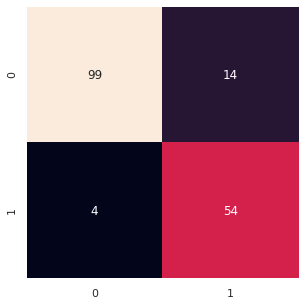

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
nb= confusion_matrix(yy_test,y_pred_nb)
sns.heatmap(nb.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [ ]:
nb_df=pd.DataFrame({'yy_test':yy_test,'y_pred_nb':y_pred_nb})
nb_df.head()

,yy_test,y_pred_nb
333,0,0
273,0,0
201,1,1
178,0,0
85,1,1


In [ ]:
nb_df.groupby(['yy_test','y_pred_nb'])['y_pred_nb'].count()   # difference between actual and Predicted

yy_test  y_pred_nb
0        0            99
         1             4
1        0            14
         1            54
Name: y_pred_nb, dtype: int64

In [ ]:
from sklearn.metrics import classification_report
print(classification_report (yy_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       103
           1       0.93      0.79      0.86        68

    accuracy                           0.89       171
   macro avg       0.90      0.88      0.89       171
weighted avg       0.90      0.89      0.89       171



In [ ]:
y.head(2)

0    1
1    1
Name: diagnosis_M, dtype: uint8

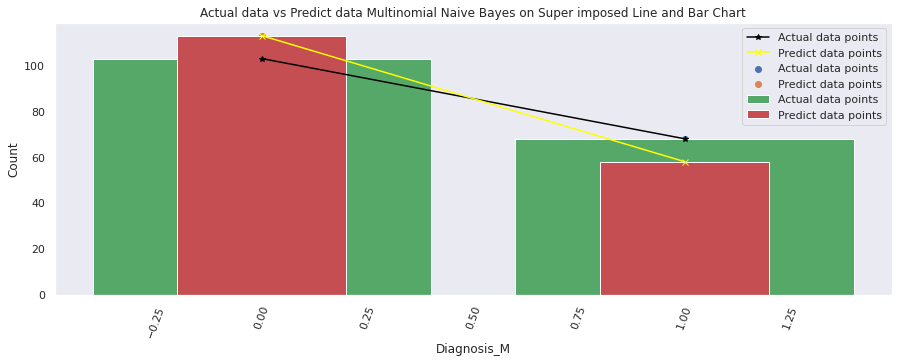

In [ ]:
actual_nb=nb_df['yy_test'].value_counts()
predict_nb=nb_df['y_pred_nb'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Multinomial Naive Bayes on Super imposed Line and Bar Chart")
plt.xlabel('Diagnosis_M')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [ ]:
print("MultinomialNB Accuracy:",metrics.accuracy_score(yy_test,y_pred_nb))

MultinomialNB Accuracy: 0.8947368421052632


### 2. Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(xx_train,yy_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.score(xx_train,yy_train)

0.9371859296482412

In [ ]:
lr.score(xx_test,yy_test)

0.9649122807017544

In [ ]:
y_pred_lr = lr.predict(xx_test)
len(y_pred_lr),y_pred_lr

(171, array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
        1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1], dtype=uint8))

In [ ]:
metrics.accuracy_score(yy_test,y_pred_lr)

0.9649122807017544

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yy_test,y_pred_lr)

array([[101,   2],
       [  4,  64]])

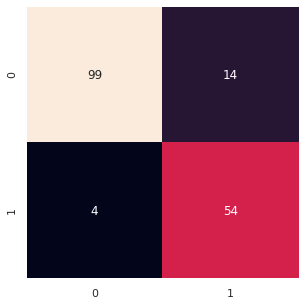

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
lr= confusion_matrix(yy_test,y_pred_nb)
sns.heatmap(lr.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [ ]:
lr_df=pd.DataFrame({'yy_test':yy_test,'y_pred_lr':y_pred_lr})
lr_df.head()

,yy_test,y_pred_lr
333,0,0
273,0,0
201,1,1
178,0,0
85,1,1


In [ ]:
lr_df.groupby(['yy_test','y_pred_lr'])['y_pred_lr'].count()

yy_test  y_pred_lr
0        0            101
         1              2
1        0              4
         1             64
Name: y_pred_lr, dtype: int64

In [ ]:
from sklearn.metrics import classification_report
print(classification_report (yy_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       103
           1       0.97      0.94      0.96        68

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



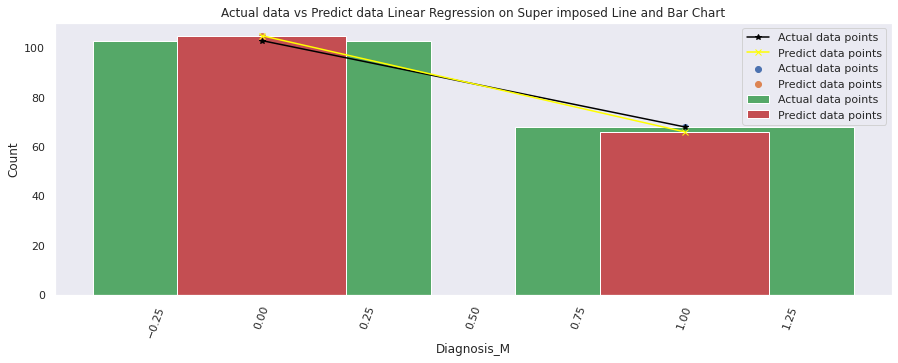

In [ ]:
actual_nb=lr_df['yy_test'].value_counts()
predict_nb=lr_df['y_pred_lr'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Linear Regression on Super imposed Line and Bar Chart")
plt.xlabel('Diagnosis_M')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [ ]:
metrics.accuracy_score(yy_test,y_pred_lr)

0.9649122807017544

### 3. Random  Forest  Classifier  

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=10,max_depth=5,max_features='sqrt',min_samples_split=20)

In [ ]:
rfc.fit(xx_train,yy_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc.score(xx_test,yy_test)

0.9824561403508771

In [ ]:
rfc.score(xx_train,yy_train)

0.9120603015075377

In [ ]:
y_pred_rfc = rfc.predict(xx_test)
y_pred_rfc

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0], dtype=uint8)

In [ ]:
confusion_matrix(yy_test,y_pred_rfc)

array([[102,   1],
       [  2,  66]])

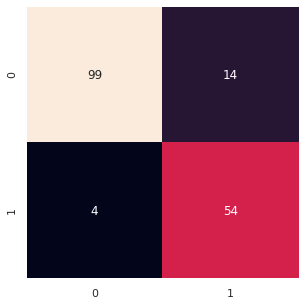

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
rfc= confusion_matrix(yy_test,y_pred_nb)
sns.heatmap(rfc.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [ ]:
rfc_df=pd.DataFrame({'yy_test':yy_test,'y_pred_rfc':y_pred_rfc})
rfc_df.head()

,yy_test,y_pred_rfc
333,0,0
273,0,0
201,1,1
178,0,0
85,1,1


In [ ]:
rfc_df.groupby(['yy_test','y_pred_rfc'])['y_pred_rfc'].count()

yy_test  y_pred_rfc
0        0             102
         1               1
1        0               2
         1              66
Name: y_pred_rfc, dtype: int64

In [ ]:
print(classification_report(yy_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       103
           1       0.99      0.97      0.98        68

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



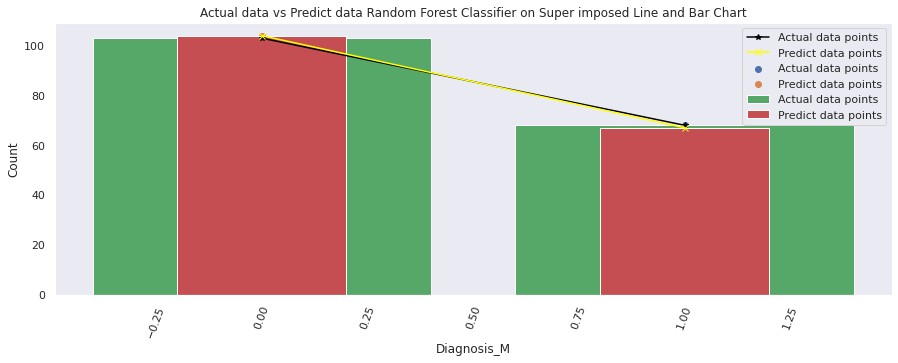

In [ ]:
actual_nb=rfc_df['yy_test'].value_counts()
predict_nb=rfc_df['y_pred_rfc'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Random Forest Classifier on Super imposed Line and Bar Chart")
plt.xlabel('Diagnosis_M')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [ ]:
metrics.accuracy_score(yy_test,y_pred_rfc)

0.9824561403508771

In [ ]:
from sklearn import tree

### 4. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xx_train,yy_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print(dt.score(xx_train,yy_train))
print(dt.score(xx_test,yy_test))

1.0
0.935672514619883


In [ ]:
y_pred_dt = dt.predict(xx_test)
y_pred_dt

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1], dtype=uint8)

In [ ]:
confusion_matrix(yy_test,y_pred_dt)

array([[98,  5],
       [ 6, 62]])

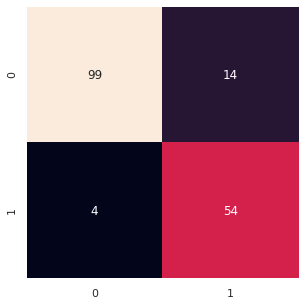

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
dt= confusion_matrix(yy_test,y_pred_nb)
sns.heatmap(dt.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [ ]:
dt_df=pd.DataFrame({'yy_test':yy_test,'y_pred_dt':y_pred_dt})
dt_df.head()

,yy_test,y_pred_dt
333,0,0
273,0,0
201,1,1
178,0,0
85,1,1


In [ ]:
dt_df.groupby(['yy_test','y_pred_dt'])['y_pred_dt'].count()

yy_test  y_pred_dt
0        0            98
         1             5
1        0             6
         1            62
Name: y_pred_dt, dtype: int64

In [ ]:
print(classification_report(yy_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       103
           1       0.93      0.91      0.92        68

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



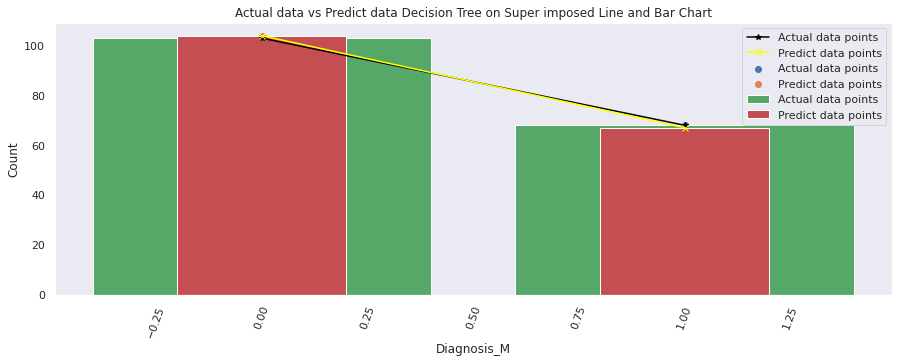

In [ ]:
actual_nb=dt_df['yy_test'].value_counts()
predict_nb=dt_df['y_pred_dt'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Decision Tree on Super imposed Line and Bar Chart")
plt.xlabel('Diagnosis_M')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [ ]:
print(accuracy_score(yy_test,y_pred_dt))

0.935672514619883


### 5. K- Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(xx_train,yy_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [ ]:
print(knn.score(xx_train,yy_train))
print(knn.score(xx_test,yy_test))

0.9321608040201005
0.9181286549707602


In [ ]:
y_pred_knn = knn.predict(xx_test)  # numpy
y_pred_knn

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0], dtype=uint8)

In [ ]:
print(confusion_matrix (yy_test,y_pred_knn))

[[101   2]
 [ 12  56]]


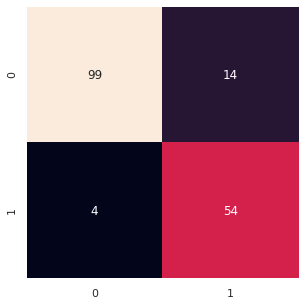

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
knn= confusion_matrix(yy_test,y_pred_nb)
sns.heatmap(knn.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [ ]:
knn_df=pd.DataFrame({'yy_test':yy_test,'y_pred_knn':y_pred_knn})
knn_df.head()

,yy_test,y_pred_knn
333,0,0
273,0,0
201,1,1
178,0,0
85,1,1


In [ ]:
knn_df.groupby(['yy_test','y_pred_knn'])['y_pred_knn'].count()

yy_test  y_pred_knn
0        0             101
         1               2
1        0              12
         1              56
Name: y_pred_knn, dtype: int64

In [ ]:
print(classification_report (yy_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       103
           1       0.97      0.82      0.89        68

    accuracy                           0.92       171
   macro avg       0.93      0.90      0.91       171
weighted avg       0.92      0.92      0.92       171



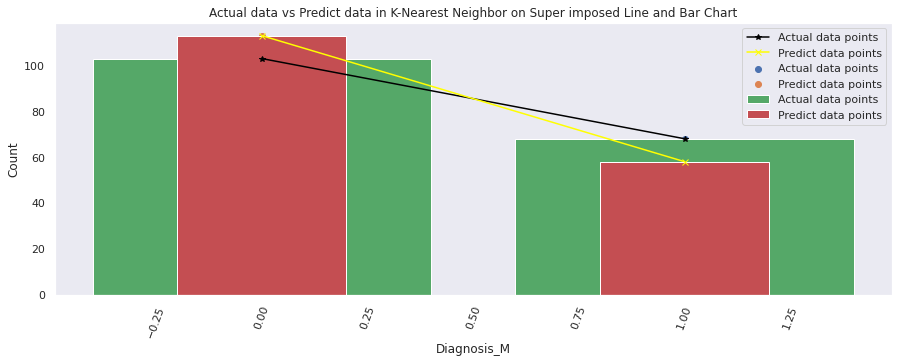

In [ ]:
actual_nb=knn_df['yy_test'].value_counts()
predict_nb=knn_df['y_pred_knn'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data in K-Nearest Neighbor on Super imposed Line and Bar Chart")
plt.xlabel('Diagnosis_M')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [ ]:
metrics.accuracy_score(yy_test,y_pred_knn)

0.9181286549707602

### Support Vector Machines (SVM) and Radial Basis Function (RBF) kernel

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_lin = SVC(kernel = 'linear')
svc_lin.fit(xx_train,yy_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print(svc_lin.score(xx_train,yy_train))
print(svc_lin.score(xx_test,yy_test))

0.9597989949748744
0.9707602339181286


In [ ]:
y_pred_lin = svc_lin.predict(xx_test)
y_pred_lin

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0], dtype=uint8)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

In [ ]:
confusion_matrix(yy_test,y_pred_lin)

array([[102,   1],
       [  4,  64]])

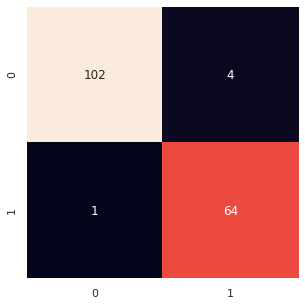

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
svc_lin= confusion_matrix(yy_test,y_pred_lin)
sns.heatmap(svc_lin.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [ ]:
print(classification_report(yy_test,y_pred_lin))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       103
           1       0.98      0.94      0.96        68

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
svc_df=pd.DataFrame({'yy_test':yy_test,'y_pred_lin':y_pred_lin})
svc_df.head()

,yy_test,y_pred_lin
333,0,0
273,0,0
201,1,1
178,0,0
85,1,1


In [ ]:
svc_df.groupby(['yy_test','y_pred_lin'])['y_pred_lin'].count()   

yy_test  y_pred_lin
0        0             102
         1               1
1        0               4
         1              64
Name: y_pred_lin, dtype: int64

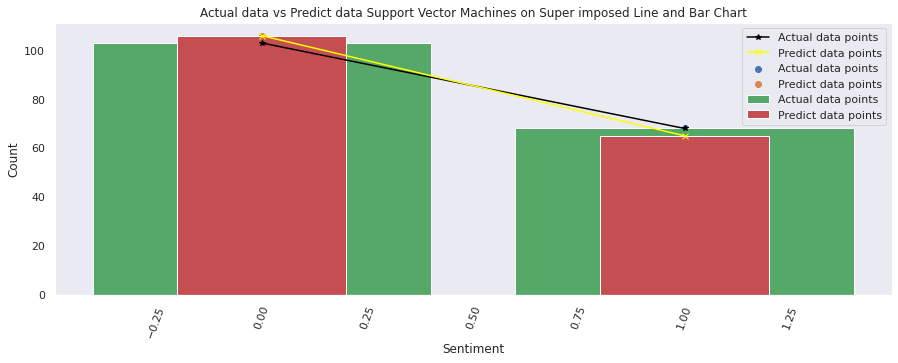

In [ ]:
actual_nb=svc_df['yy_test'].value_counts()
predict_nb=svc_df['y_pred_lin'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Support Vector Machines on Super imposed Line and Bar Chart")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [ ]:
print('Accuracy Score for Poly SVC',accuracy_score(yy_test,y_pred_lin))

Accuracy Score for Poly SVC 0.9707602339181286


### Radial Basis Function (RBF) kernel

In [ ]:
svc_rbf = SVC(kernel = 'rbf',C=0.2,gamma=0.3)
svc_rbf.fit(xx_train,yy_train)

SVC(C=0.2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print(svc_rbf.score(xx_train,yy_train))
print(svc_rbf.score(xx_test,yy_test))

0.6381909547738693
0.6023391812865497


In [ ]:
y_pred_rbf = svc_rbf.predict(xx_test)
y_pred_rbf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
confusion_matrix(yy_test,y_pred_rbf)

array([[103,   0],
       [ 68,   0]])

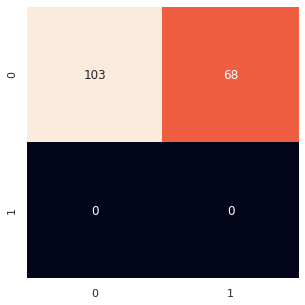

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
svc_rbf= confusion_matrix(yy_test,y_pred_rbf)
sns.heatmap(svc_rbf.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [ ]:
print(classification_report(yy_test,y_pred_rbf))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       103
           1       0.00      0.00      0.00        68

    accuracy                           0.60       171
   macro avg       0.30      0.50      0.38       171
weighted avg       0.36      0.60      0.45       171



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Accuracy Score for Poly SVC',accuracy_score(yy_test,y_pred_rbf))

Accuracy Score for Poly SVC 0.6023391812865497


In [ ]:
svc_df=pd.DataFrame({'yy_test':yy_test,'y_pred_rbf':y_pred_rbf})
svc_df.head()

,yy_test,y_pred_rbf
333,0,0
273,0,0
201,1,0
178,0,0
85,1,0


In [ ]:
svc_df.groupby(['yy_test','y_pred_rbf'])['y_pred_rbf'].count()   

yy_test  y_pred_rbf
0        0             103
1        0              68
Name: y_pred_rbf, dtype: int64

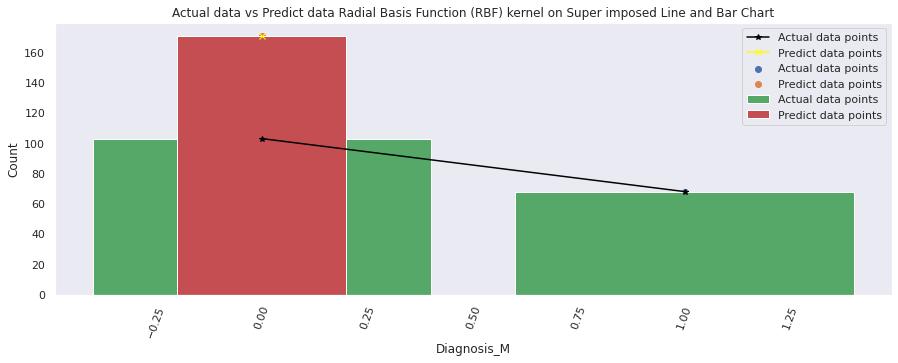

In [ ]:
actual_nb=svc_df['yy_test'].value_counts()
predict_nb=svc_df['y_pred_rbf'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Radial Basis Function (RBF) kernel on Super imposed Line and Bar Chart")
plt.xlabel('Diagnosis_M')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [ ]:
print('Accuracy Score for Poly SVC',accuracy_score(yy_test,y_pred_rbf))

Accuracy Score for Poly SVC 0.6023391812865497


# 4 diagnosis_M
### *1.* Naive Bayes

In [ ]:
df1.head(2)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,842302,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,1
1,842517,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1


In [ ]:
X=df1.iloc[:,2:]
y=df1.iloc[:,-2]

In [ ]:
X.shape,y.shape

((569, 31), (569,))

In [ ]:
X,y 

(     texture_mean  perimeter_mean  ...  diagnosis_B  diagnosis_M
 0           10.38          122.80  ...            0            1
 1           17.77          132.90  ...            0            1
 2           21.25          130.00  ...            0            1
 3           20.38           77.58  ...            0            1
 4           14.34          135.10  ...            0            1
 ..            ...             ...  ...          ...          ...
 564         22.39          142.00  ...            0            1
 565         28.25          131.20  ...            0            1
 566         28.08          108.30  ...            0            1
 567         29.33          140.10  ...            0            1
 568         24.54           47.92  ...            1            0
 
 [569 rows x 31 columns], 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 564    0
 565    0
 566    0
 567    0
 568    1
 Name: diagnosis_B, Length: 569, dtype: uint8)

In [ ]:
from sklearn.model_selection import train_test_split
xx_train, xx_test, yy_train, yy_test = train_test_split(X,y, test_size=0.3, random_state=123)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
nb= MultinomialNB().fit(xx_train,yy_train)
nb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
nb.score(xx_train,yy_train)

0.9195979899497487

In [ ]:
nb.score(xx_test,yy_test)

0.9239766081871345

In [ ]:
y_pred_nb= nb.predict(xx_test)
print(len(y_pred_nb))
y_pred_nb

171


array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1], dtype=uint8)

In [ ]:
metrics.accuracy_score(yy_test,y_pred_nb)

0.9239766081871345

In [ ]:
print(confusion_matrix (yy_test,y_pred_nb))

[[ 55  13]
 [  0 103]]


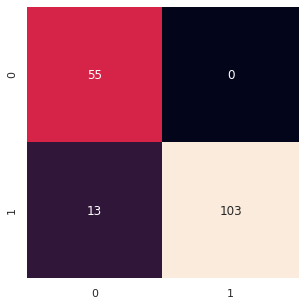

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
nb= confusion_matrix(yy_test,y_pred_nb)
sns.heatmap(nb.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [ ]:
nb_df=pd.DataFrame({'yy_test':yy_test,'y_pred_nb':y_pred_nb})
nb_df.head()

,yy_test,y_pred_nb
333,1,1
273,1,1
201,0,0
178,1,1
85,0,0


In [ ]:
nb_df.groupby(['yy_test','y_pred_nb'])['y_pred_nb'].count()   # difference between actual and Predicted

yy_test  y_pred_nb
0        0             55
         1             13
1        1            103
Name: y_pred_nb, dtype: int64

In [ ]:
from sklearn.metrics import classification_report
print(classification_report (yy_test,y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89        68
           1       0.89      1.00      0.94       103

    accuracy                           0.92       171
   macro avg       0.94      0.90      0.92       171
weighted avg       0.93      0.92      0.92       171



In [ ]:
y.head(2)

0    0
1    0
Name: diagnosis_B, dtype: uint8

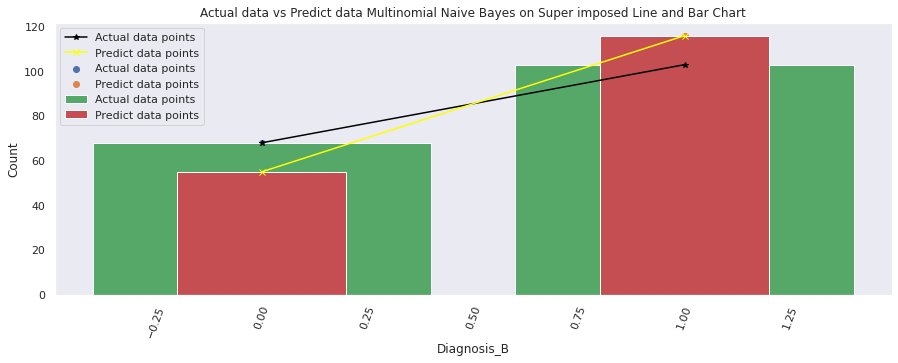

In [ ]:
actual_nb=nb_df['yy_test'].value_counts()
predict_nb=nb_df['y_pred_nb'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Multinomial Naive Bayes on Super imposed Line and Bar Chart")
plt.xlabel('Diagnosis_B')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [ ]:
print("MultinomialNB Accuracy:",metrics.accuracy_score(yy_test,y_pred_nb))

MultinomialNB Accuracy: 0.9239766081871345


## 2. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(xx_train,yy_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.score(xx_train,yy_train)

0.9974874371859297

In [ ]:
lr.score(xx_test,yy_test)

0.9941520467836257

In [ ]:
y_pred_lr = lr.predict(xx_test)
len(y_pred_lr),y_pred_lr

(171, array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
        0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
        1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0], dtype=uint8))

In [ ]:
metrics.accuracy_score(yy_test,y_pred_lr)

0.9941520467836257

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yy_test,y_pred_lr)

array([[ 68,   0],
       [  1, 102]])

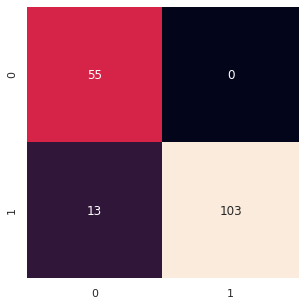

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
lr= confusion_matrix(yy_test,y_pred_nb)
sns.heatmap(lr.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [ ]:
lr_df=pd.DataFrame({'yy_test':yy_test,'y_pred_lr':y_pred_lr})
lr_df.head()

,yy_test,y_pred_lr
333,1,1
273,1,1
201,0,0
178,1,1
85,0,0


In [ ]:
lr_df.groupby(['yy_test','y_pred_lr'])['y_pred_lr'].count()

yy_test  y_pred_lr
0        0             68
1        0              1
         1            102
Name: y_pred_lr, dtype: int64

In [ ]:
from sklearn.metrics import classification_report
print(classification_report (yy_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       1.00      0.99      1.00       103

    accuracy                           0.99       171
   macro avg       0.99      1.00      0.99       171
weighted avg       0.99      0.99      0.99       171



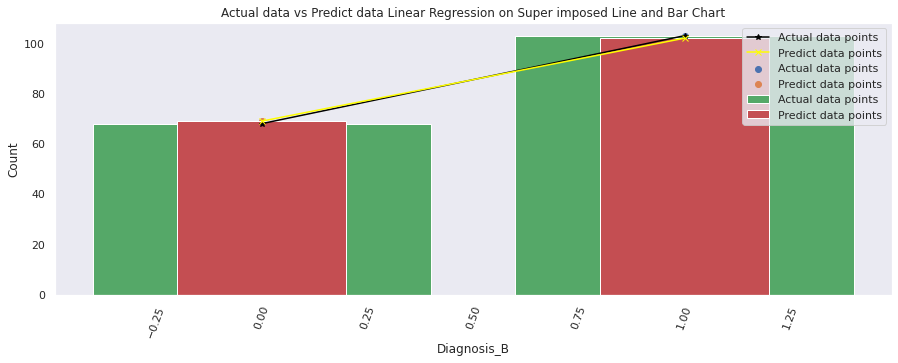

In [ ]:
actual_nb=lr_df['yy_test'].value_counts()
predict_nb=lr_df['y_pred_lr'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Linear Regression on Super imposed Line and Bar Chart")
plt.xlabel('Diagnosis_B')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [ ]:
metrics.accuracy_score(yy_test,y_pred_lr)

0.9941520467836257

### 3. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=10,max_depth=5,max_features='sqrt',min_samples_split=20)

In [ ]:
rfc.fit(xx_train,yy_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc.score(xx_test,yy_test)

1.0

In [ ]:
rfc.score(xx_train,yy_train)

1.0

In [ ]:
y_pred_rfc = rfc.predict(xx_test)
y_pred_rfc

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0], dtype=uint8)

In [ ]:
confusion_matrix(yy_test,y_pred_rfc)

array([[ 68,   0],
       [  0, 103]])

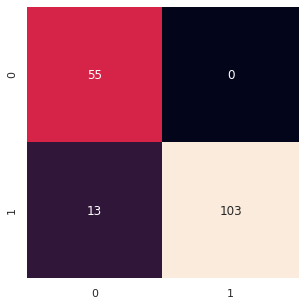

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
rfc= confusion_matrix(yy_test,y_pred_nb)
sns.heatmap(rfc.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [ ]:
rfc_df=pd.DataFrame({'yy_test':yy_test,'y_pred_rfc':y_pred_rfc})
rfc_df.head()

,yy_test,y_pred_rfc
333,1,1
273,1,1
201,0,0
178,1,1
85,0,0


In [ ]:
rfc_df.groupby(['yy_test','y_pred_rfc'])['y_pred_rfc'].count()

yy_test  y_pred_rfc
0        0              68
1        1             103
Name: y_pred_rfc, dtype: int64

In [ ]:
print(classification_report(yy_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00       103

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



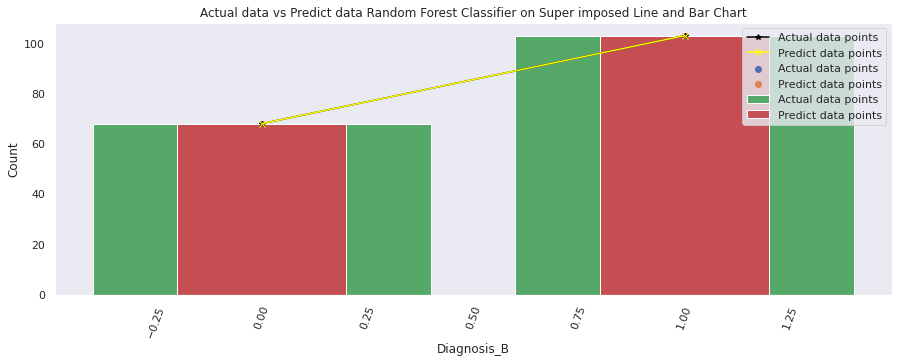

In [ ]:
actual_nb=rfc_df['yy_test'].value_counts()
predict_nb=rfc_df['y_pred_rfc'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Random Forest Classifier on Super imposed Line and Bar Chart")
plt.xlabel('Diagnosis_B')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [ ]:
metrics.accuracy_score(yy_test,y_pred_rfc)

1.0

### 4. Decision Tree

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xx_train,yy_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print(dt.score(xx_train,yy_train))
print(dt.score(xx_test,yy_test))

1.0
1.0


In [ ]:
y_pred_dt = dt.predict(xx_test)
y_pred_dt

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0], dtype=uint8)

In [ ]:
confusion_matrix(yy_test,y_pred_dt)

array([[ 68,   0],
       [  0, 103]])

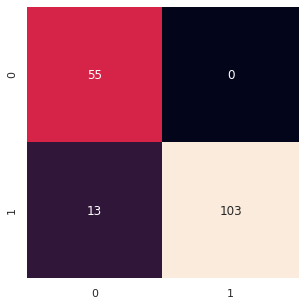

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
dt= confusion_matrix(yy_test,y_pred_nb)
sns.heatmap(dt.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [ ]:
dt_df=pd.DataFrame({'yy_test':yy_test,'y_pred_dt':y_pred_dt})
dt_df.head()

,yy_test,y_pred_dt
333,1,1
273,1,1
201,0,0
178,1,1
85,0,0


In [ ]:
dt_df.groupby(['yy_test','y_pred_dt'])['y_pred_dt'].count()

yy_test  y_pred_dt
0        0             68
1        1            103
Name: y_pred_dt, dtype: int64

In [ ]:
print(classification_report(yy_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00       103

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



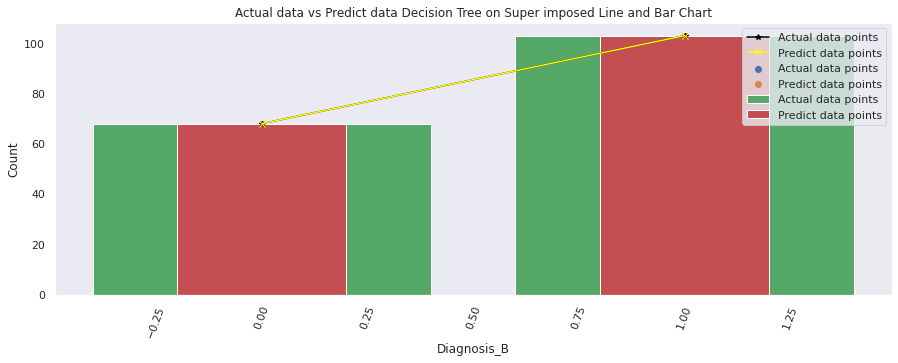

In [ ]:
actual_nb=dt_df['yy_test'].value_counts()
predict_nb=dt_df['y_pred_dt'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Decision Tree on Super imposed Line and Bar Chart")
plt.xlabel('Diagnosis_B')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [ ]:
print(accuracy_score(yy_test,y_pred_dt))

1.0


### 5. K- Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(xx_train,yy_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [ ]:
print(knn.score(xx_train,yy_train))
print(knn.score(xx_test,yy_test))

0.9321608040201005
0.9181286549707602


In [ ]:
y_pred_knn = knn.predict(xx_test)  # numpy
y_pred_knn

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1], dtype=uint8)

In [ ]:
print(confusion_matrix (yy_test,y_pred_knn))

[[ 56  12]
 [  2 101]]


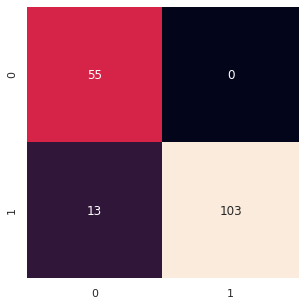

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
knn= confusion_matrix(yy_test,y_pred_nb)
sns.heatmap(knn.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [ ]:
knn_df=pd.DataFrame({'yy_test':yy_test,'y_pred_knn':y_pred_knn})
knn_df.head()

,yy_test,y_pred_knn
333,1,1
273,1,1
201,0,0
178,1,1
85,0,0


In [ ]:
knn_df.groupby(['yy_test','y_pred_knn'])['y_pred_knn'].count()

yy_test  y_pred_knn
0        0              56
         1              12
1        0               2
         1             101
Name: y_pred_knn, dtype: int64

In [ ]:
print(classification_report (yy_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89        68
           1       0.89      0.98      0.94       103

    accuracy                           0.92       171
   macro avg       0.93      0.90      0.91       171
weighted avg       0.92      0.92      0.92       171



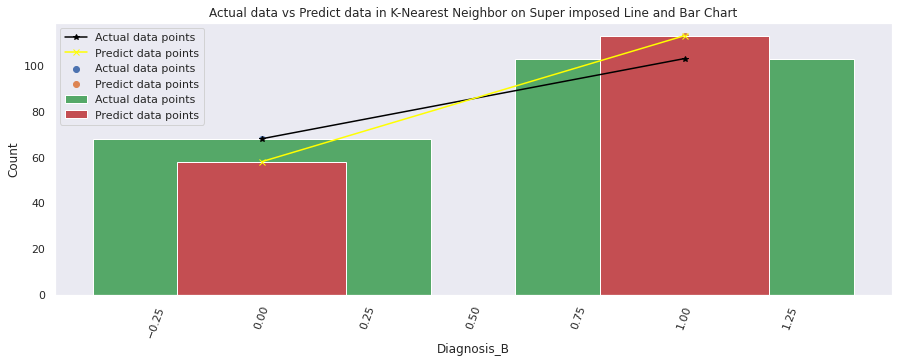

In [ ]:
actual_nb=knn_df['yy_test'].value_counts()
predict_nb=knn_df['y_pred_knn'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data in K-Nearest Neighbor on Super imposed Line and Bar Chart")
plt.xlabel('Diagnosis_B')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [ ]:
metrics.accuracy_score(yy_test,y_pred_knn)

0.9181286549707602

### Support Vector Machines (SVM) and Radial Basis Function (RBF) kernel

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_lin = SVC(kernel = 'linear')
svc_lin.fit(xx_train,yy_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print(svc_lin.score(xx_train,yy_train))
print(svc_lin.score(xx_test,yy_test))

1.0
1.0


In [ ]:
y_pred_lin = svc_lin.predict(xx_test)
y_pred_lin

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0], dtype=uint8)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

In [ ]:
confusion_matrix(yy_test,y_pred_lin)

array([[ 68,   0],
       [  0, 103]])

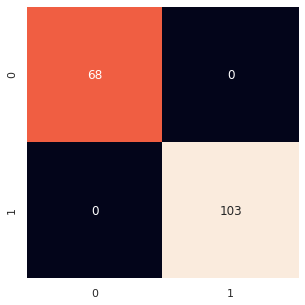

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
svc_lin= confusion_matrix(yy_test,y_pred_lin)
sns.heatmap(svc_lin.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [ ]:
print(classification_report(yy_test,y_pred_lin))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00       103

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



In [ ]:
svc_df=pd.DataFrame({'yy_test':yy_test,'y_pred_lin':y_pred_lin})
svc_df.head()

,yy_test,y_pred_lin
333,1,1
273,1,1
201,0,0
178,1,1
85,0,0


In [ ]:
svc_df.groupby(['yy_test','y_pred_lin'])['y_pred_lin'].count()   

yy_test  y_pred_lin
0        0              68
1        1             103
Name: y_pred_lin, dtype: int64

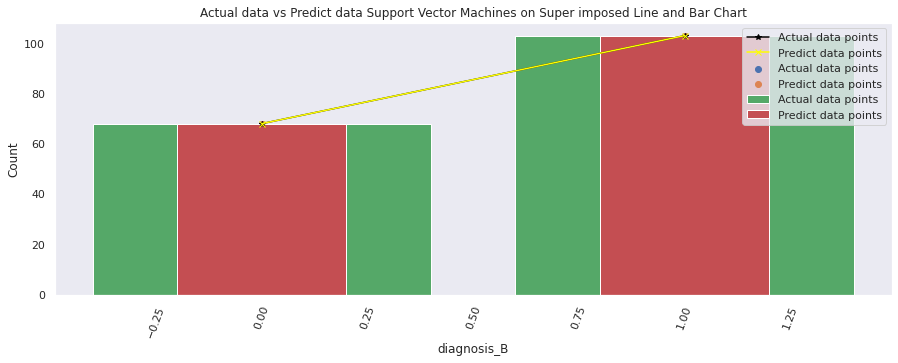

In [ ]:
actual_nb=svc_df['yy_test'].value_counts()
predict_nb=svc_df['y_pred_lin'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Support Vector Machines on Super imposed Line and Bar Chart")
plt.xlabel('diagnosis_B')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [ ]:
print('Accuracy Score for Poly SVC',accuracy_score(yy_test,y_pred_lin))

Accuracy Score for Poly SVC 1.0


### Radial Basis Function (RBF) kernel

In [ ]:
svc_rbf = SVC(kernel = 'rbf',C=0.2,gamma=0.3)
svc_rbf.fit(xx_train,yy_train)

SVC(C=0.2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print(svc_rbf.score(xx_train,yy_train))
print(svc_rbf.score(xx_test,yy_test))

0.6381909547738693
0.6023391812865497


In [ ]:
y_pred_rbf = svc_rbf.predict(xx_test)
y_pred_rbf

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [ ]:
confusion_matrix(yy_test,y_pred_rbf)

array([[  0,  68],
       [  0, 103]])

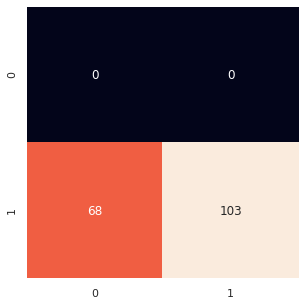

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
svc_rbf= confusion_matrix(yy_test,y_pred_rbf)
sns.heatmap(svc_rbf.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [ ]:
print(classification_report(yy_test,y_pred_rbf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.60      1.00      0.75       103

    accuracy                           0.60       171
   macro avg       0.30      0.50      0.38       171
weighted avg       0.36      0.60      0.45       171



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Accuracy Score for Poly SVC',accuracy_score(yy_test,y_pred_rbf))

Accuracy Score for Poly SVC 0.6023391812865497


In [ ]:
svc_df=pd.DataFrame({'yy_test':yy_test,'y_pred_rbf':y_pred_rbf})
svc_df.head()

,yy_test,y_pred_rbf
333,1,1
273,1,1
201,0,1
178,1,1
85,0,1


In [ ]:
svc_df.groupby(['yy_test','y_pred_rbf'])['y_pred_rbf'].count()   

yy_test  y_pred_rbf
0        1              68
1        1             103
Name: y_pred_rbf, dtype: int64

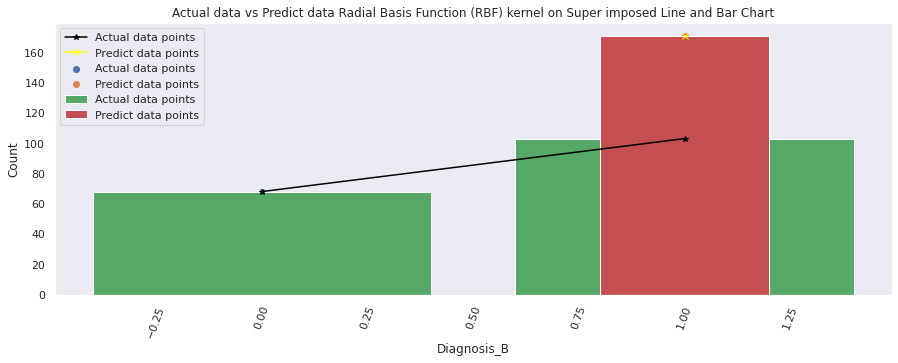

In [ ]:
actual_nb=svc_df['yy_test'].value_counts()
predict_nb=svc_df['y_pred_rbf'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Radial Basis Function (RBF) kernel on Super imposed Line and Bar Chart")
plt.xlabel('Diagnosis_B')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [ ]:
print('Accuracy Score for Poly SVC',accuracy_score(yy_test,y_pred_rbf))

Accuracy Score for Poly SVC 0.6023391812865497


In [ ]:
Breast_Cancer's_Diagnosis_Analysis_Project --
 ( Artificial Neural Network, K-Nearest Neighbor, Naïve Bayes, Logistic Regression, Decision Tree, Random Forest, 
 Support Vector Machine, Random Forest )-- Classifier Project




 1. Diagnosis
 
 0. Artificial Neural Network 
 
    Accurecy Score :- 0.9649122807017544 
 
    confusion matrix :- 
    
    [[31  0]
    [ 2 24]]
    
    classification_report :-
    
    precision    recall  f1-score   support

           0       0.94      1.00      0.97        31
           1       1.00      0.92      0.96        26

    accuracy                           0.96        57
   macro avg       0.97      0.96      0.96        57
weighted avg       0.97      0.96      0.96        57


 
 
 
1. Multinomial Naive Bayes

 Accurecy Score :- 0.8947368421052632
 
    confusion matrix :- 
    
 [[71  2]
 [ 9 32]]

    
    classification_report :-
    
   precision    recall  f1-score   support

           B       0.97      1.00      0.99        73
           M       1.00      0.95      0.97        41

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114






2. Logistic Regression

 Accurecy Score :- 0.9824561403508771
 
    confusion matrix :- 
    
   ([[73,  0],
    [ 2, 39]])
    
    classification_report :-
    
       precision    recall  f1-score   support

           B       0.97      1.00      0.99        73
           M       1.00      0.95      0.97        41

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114




3. Random Forest Classifier

 Accurecy Score :- 1.0
 
    confusion matrix :- 
    
   ([[73,  0],
    [ 0, 41]])
    
    classification_report :-
    
             precision    recall  f1-score   support

           B       1.00      1.00      1.00        73
           M       1.00      1.00      1.00        41

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114


4. Decision Tree

 Accurecy Score :- 0.9824561403508771
 
    confusion matrix :- 
   ([[98,  5],
    [ 6, 62]])
    
    classification_report :-
    
   precision    recall  f1-score   support

           0       0.94      0.95      0.95       103
           1       0.93      0.91      0.92        68

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171


4. Decision Tree

 Accurecy Score :- 0.9649122807017544
 
    confusion matrix :- 
   ([[72,  1],
       [ 3, 38]])
    
    classification_report :-
    
precision    recall  f1-score   support

           B       0.96      0.99      0.97        73
           M       0.97      0.93      0.95        41

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


5. K- Nearest Neighbor¶

 Accurecy Score :- 0.9385964912280702
 
    confusion matrix :- 
  [[72  1]
 [ 6 35]]
    
    classification_report :-
    
precision    recall  f1-score   support

           B       0.92      0.99      0.95        73
           M       0.97      0.85      0.91        41

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114


6. Support Vector Machines (SVM)

 Accurecy Score :- 0.9824561403508771
 
    confusion matrix :- 
 ([[73,  0],
  [ 2, 39]])
    
    classification_report :-
    
   precision    recall  f1-score   support

           B       0.97      1.00      0.99        73
           M       1.00      0.95      0.97        41

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


7. Radial Basis Function (RBF) kernel

 Accurecy Score :- 0.9824561403508771
 
    confusion matrix :- 
 ([[73,  0],
  [41,  0]])
    
    classification_report :-
    
  precision    recall  f1-score   support

           B       0.64      1.00      0.78        73
           M       0.00      0.00      0.00        41

    accuracy                           0.64       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.41      0.64      0.50       114




#### Artificial Neural Network Use Two Model    - here use two dependent variable in one ANN Model
 
###### 3. Diagnosis_B  4 diagnosis_M
 
 0. Artificial Neural Network 
 
    Accurecy Score :- 0.8947368421052632
 
    confusion matrix :- 
    
    [[99  4]
    [14 54]]

    
    classification_report :-
    
     precision    recall  f1-score   support

           0       0.88      0.96      0.92       103
           1       0.93      0.79      0.86        68

    accuracy                           0.89       171
   macro avg       0.90      0.88      0.89       171
weighted avg       0.90      0.89      0.89       171


 
####  3. Diagnosis_B  
 
1. Multinomial Naive Bayes

 Accurecy Score :- 0.8947368421052632
 
    confusion matrix :- 
    
 [[99  4]
 [14 54]]
    
    classification_report :-
    
  precision    recall  f1-score   support

           0       0.88      0.96      0.92       103
           1       0.93      0.79      0.86        68

    accuracy                           0.89       171
   macro avg       0.90      0.88      0.89       171
weighted avg       0.90      0.89      0.89       171






2. Logistic Regression

 Accurecy Score :- 0.9649122807017544
 
    confusion matrix :- 
    
([[101,   2],
[  4,  64]])
    
    classification_report :-
    
        precision    recall  f1-score   support

           0       0.96      0.98      0.97       103
           1       0.97      0.94      0.96        68

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171




3. Random Forest Classifier

 Accurecy Score :- 0.9824561403508771
 
    confusion matrix :- 
    
([[102,   1],
 [  2,  66]])
    
    classification_report :-
    
        precision    recall  f1-score   support

           0       0.98      0.99      0.99       103
           1       0.99      0.97      0.98        68

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171


4. Decision Tree

 Accurecy Score :- 0.935672514619883
 
    confusion matrix :- 
  ([[98,  5],
       [ 6, 62]])
    classification_report :-
    
   precision    recall  f1-score   support

           0       0.94      0.95      0.95       103
           1       0.93      0.91      0.92        68

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171




5. K- Nearest Neighbor¶

 Accurecy Score :- 0.9181286549707602
 
    confusion matrix :- 
  [[101   2]
 [ 12  56]]
    
    classification_report :-
    
  precision    recall  f1-score   support

           0       0.89      0.98      0.94       103
           1       0.97      0.82      0.89        68

    accuracy                           0.92       171
   macro avg       0.93      0.90      0.91       171
weighted avg       0.92      0.92      0.92       171

6. Support Vector Machines (SVM)

 Accurecy Score :- 0.9707602339181286
 
    confusion matrix :- 
 ([[102,   1],
  [  4,  64]])
    
    classification_report :-
    
 precision    recall  f1-score   support

           0       0.96      0.99      0.98       103
           1       0.98      0.94      0.96        68

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171


7. Radial Basis Function (RBF) kernel

 Accurecy Score :- 0.6023391812865497
 
    confusion matrix :- 
 ([[103,   0],
       [ 68,   0]])
    
    classification_report :-
    
  precision    recall  f1-score   support

           0       0.60      1.00      0.75       103
           1       0.00      0.00      0.00        68

    accuracy                           0.60       171
   macro avg       0.30      0.50      0.38       171
weighted avg       0.36      0.60      0.45       171



##### 4 diagnosis_M
 
 
 
1. Multinomial Naive Bayes

 Accurecy Score :- 0.9239766081871345
 
    confusion matrix :- 
    
[[ 55  13]
 [  0 103]]
    
    classification_report :-
    
   precision    recall  f1-score   support

           0       1.00      0.81      0.89        68
           1       0.89      1.00      0.94       103

    accuracy                           0.92       171
   macro avg       0.94      0.90      0.92       171
weighted avg       0.93      0.92      0.92       171







2. Logistic Regression

 Accurecy Score :- 0.9941520467836257
 
    confusion matrix :- 
    
  ([[ 68,   0],
       [  1, 102]])
    
    classification_report :-
    
        precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       1.00      0.99      1.00       103

    accuracy                           0.99       171
   macro avg       0.99      1.00      0.99       171
weighted avg       0.99      0.99      0.99       171




3. Random Forest Classifier

 Accurecy Score :- 1.0
 
    confusion matrix :- 
    
  ([[ 68,   0],
       [  0, 103]])
    
    classification_report :-
    
         precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00       103

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171


4. Decision Tree

 Accurecy Score :- 1.0
 
    confusion matrix :- 
   ([[ 68,   0],
       [  0, 103]])
    
    classification_report :-
    
    precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00       103

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



5. K- Nearest Neighbor¶

 Accurecy Score :- 0.9181286549707602
 
    confusion matrix :- 

[[ 56  12]
 [  2 101]]

    
    classification_report :-
    
precision    recall  f1-score   support

           0       0.97      0.82      0.89        68
           1       0.89      0.98      0.94       103

    accuracy                           0.92       171
   macro avg       0.93      0.90      0.91       171
weighted avg       0.92      0.92      0.92       171


6. Support Vector Machines (SVM)

 Accurecy Score :- 1.0
 
    confusion matrix :- 
([[ 68,   0],
       [  0, 103]])
    
    classification_report :-
    
precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00       103

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171


7. Radial Basis Function (RBF) kernel

 Accurecy Score :- 0.6023391812865497
 
    confusion matrix :- 
 ([[  0,  68],
       [  0, 103]])
    
    classification_report :-
    
  precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.60      1.00      0.75       103

    accuracy                           0.60       171
   macro avg       0.30      0.50      0.38       171
weighted avg       0.36      0.60      0.45       171
 